In [1]:
import numpy as np
import graphviz as gv

In [2]:
dot = gv.Digraph('round-table', comment='The Round Table')  
dot.node('A', 'King Arthur')  
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

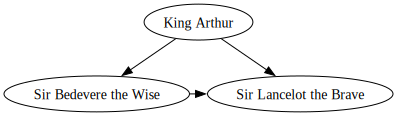

In [3]:
dot

In [54]:
import numpy as np
class Value:
    def __init__(self,data,name="",const= False):
        self.data=data
        self.grad=0
        self.operation=None
        self.children=None
        self.name=name
        self.const=const
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(0)
        other = other if isinstance(other,Value) else Value(other,name = str(other))
        out.data = self.data+other.data
        out.children = (self,other)
        out.operation="+"
        out.name = self.name + out.operation + other.name
        return out
    def __sub__(self,other):
        out = Value(0)
        other = other if isinstance(other,Value) else Value(other,str(other),True)
        out.data = self.data-other.data
        out.children = (self,other)
        out.operation="-"
        out.name = self.name + out.operation + other.name
        return out
    def __mul__(self,other):
        out = Value(0)
        other = other if isinstance(other,Value) else Value(other,str(other),True)
        out.data = self.data*other.data
        out.children = (self,other)
        out.operation="*"
        out.name = self.name + out.operation + other.name
        return out
    def __rmul__(self,other):
        return self*other
    def __truediv__(self,other):
        other = other if isinstance(other,Value) else Value(other,str(other),True)
        out = self * other**(-1)
        return out
    def tanh(self):
        out=Value(0)
        out.data = np.tanh(self.data)
        out.children=(self,)
        out.operation = "tanh"
        out.name = "tanh"
        return out
    def __pow__(self,power):
        out=Value(0)
        out.data = self.data**power
        self.power = power
        out.children=(self,)
        out.operation = "**"
        out.name = "**"
        return out
    def exp(self):
        out=Value(0)
        out.data = np.exp(self.data)
        out.children=(self,)
        out.operation = "exp"
        out.name = "exp"
        return out
    # def __eq__(self,other):
    #     # print(self.name,other.name)
    #     return self.name == other.name
    # def __hash__(self):
    #     return hash(self.name)
    def cleargrad(self):
        self.grad = 0
        if self.children is not None:
            for ch in self.children:
               ch.cleargrad()
    def backprop(self,lstch=list()):
        if self not in lstch:
                lstch.append(self)
        else:
            if self.children is not None:
                for ch in self.children:
                    ch.grad=0
        if self.operation is not None:
            if self.operation == "+":
                for ch in self.children:
                    ch.grad += self.grad
            if self.operation == "-":
                self.children[0].grad += self.grad
                self.children[1].grad += -1*self.grad
            if self.operation == "*":
                self.children[0].grad += self.grad*self.children[1].data
                self.children[1].grad += self.grad*self.children[0].data
            if self.operation == "tanh":
                self.children[0].grad += (1 - self.data**2)*self.grad
            if self.operation == "**":
                self.children[0].grad += (self.children[0].power*self.children[0].data**(self.children[0].power-1))*self.grad
            if self.operation == "exp":
                self.children[0].grad += self.data*self.grad
                
            # print(print(f"self.name = {self.name} self.operation = {self.operation} self.data = {self.data} self.grad = {self.grad}"))
            
            for ch in self.children:
                ch.backprop(lstch)
            


In [5]:
import datetime


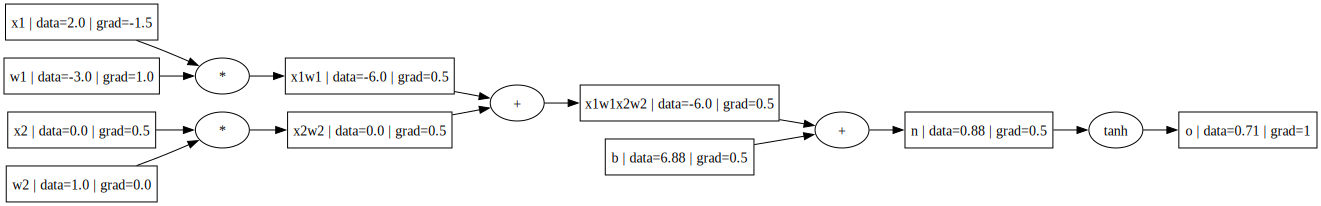

In [56]:
def draw():
    x1 = Value(2.0)
    x1.name="x1"
    x2 = Value(0.0)
    x2.name="x2"
    w1 = Value(-3.0)
    w1.name="w1"
    w2 = Value(1.0)
    w2.name="w2"
    b=Value(6.8813735870195432)
    # b=Value(100)
    b.name="b"
    x1w1=x1*w1
    x1w1.name = "x1w1"
    x2w2=x2*w2
    x2w2.name = "x2w2"
    x1w1x2w2 = x1w1+x2w2
    x1w1x2w2.name = "x1w1x2w2"
    n = x1w1x2w2 + b
    n.name = "n"
    o=n.tanh()
    o.name="o"
    o.grad=1
    o.backprop()
    return o
o=draw()
drawgraph(o,iset=list())

In [8]:

def drawgraph(v,iset=list(),dot=None,icountlst=list()):
    if dot is None:
        dot = gv.Digraph('backprop', comment='chain rule',)
        dot.graph_attr.update({'rankdir': 'LR'})
        icountlst.append(1)
    # print(v.name)
    if v in iset:
        print(f"{v} in iset")
    else:
        dot.node(v.name, f"{v.name} | data={round(v.data,2)} | grad={np.round(v.grad,2)}",shape="rectangle")
        
    
    if v.operation is not None:
        icount = max(icountlst)+1
        # icount = datetime.datetime.now()
        onode = "o"+str(icount)
        # dot.node(onode,f"{v.operation} | id = {icount}")
        dot.node(onode,f"{v.operation}")
        dot.edge(onode,v.name,rankdir="LR")
        # print(f"{onode}->{v.name}")
        icountlst.append(icount)
        
    if not v.const:
        iset.append(v)
    if v.children is not None:
        ticount = icount
        for ch in v.children:
            # print(f"parent is {v.name} child is {ch.name}")
            if ch not in iset:
                # print(icountlst)
                drawgraph(ch,iset,dot,icountlst)
            dot.edge(ch.name,onode,rankdir="LR")
            
            # icount = icount+1
   
    return dot

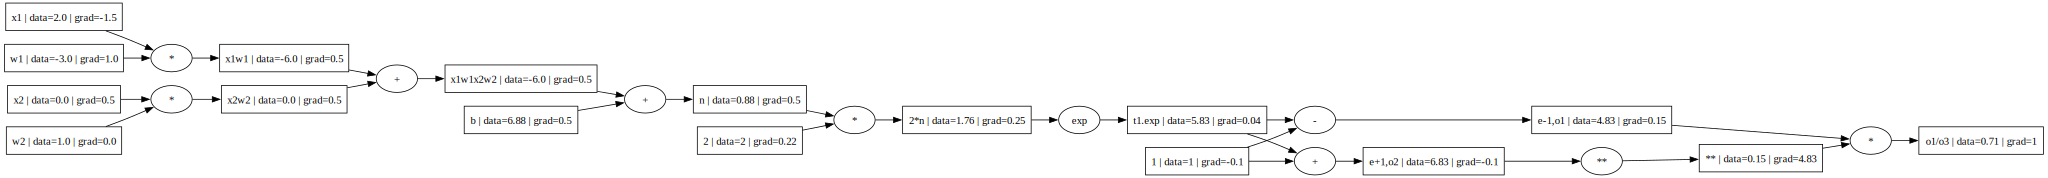

In [55]:

x1 = Value(2.0)
x1.name="x1"
x2 = Value(0.0)
x2.name="x2"
w1 = Value(-3.0)
w1.name="w1"
w2 = Value(1.0)
w2.name="w2"
b=Value(6.8813735870195432)
# b=Value(100)
b.name="b"
x1w1=x1*w1
x1w1.name = "x1w1"
x2w2=x2*w2
x2w2.name = "x2w2"
x1w1x2w2 = x1w1+x2w2
x1w1x2w2.name = "x1w1x2w2"
n = x1w1x2w2 + b
n.name = "n"
t1 = n*2
t1.name="2*n"
e = t1.exp()
e.name="t1.exp"
o1 = e-1
o1.name="e-1,o1"
o2 = e+1
o2.name = "e+1,o2"
o=o1/o2
o.name = "o1/o3"
# # o=n.tanh()
# o.name="o"
o.grad=1
o.backprop()
# return o1

drawgraph(o,iset=list())